# PART 1:

## 1. What are the advantages of a CNN over a fully connected deep neural network for image classification?

Some key advantages of using a CNN over a fully connected network for image classification include:
Parameter efficiency - By leveraging convolution layers, CNNs can extract features from images using far fewer parameters compared to fully connected layers. This makes them more efficient.
Translational invariance - CNNs can detect features regardless of their location in the image, thanks to pooling layers. This makes them well-suited for image tasks.
Ability to preserve spatial information - Convolutional layers preserve the spatial relationship between pixels, which is important for image tasks. Fully connected networks lose this spatial information.

## 2. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

Using a max pooling layer instead of a convolutional layer with the same stride reduces computational complexity. Max pooling layers simply downsample the input, reducing dimensions and parameters in the network. Convolutional layers have to learn filters to apply to the input, which is more complex.

## 3. When would you want to add a local response normalization layer?

Local response normalization layers can be useful when dealing with high frequency features in images. They help normalize activations and improve generalization by enforcing lateral inhibition between activated neurons. This can be helpful in early convolutional layers.

## 4. Test below CNN codes with MNIST data set and show the model accuracy.



In [ ]:
pip install np_utils

In [ ]:
from keras.utils import to_categorical

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.src.utils.np_utils import to_categorical

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_36 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_37 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                              

<ipython-input-27-0b814fd985a2>:162: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,


937/937 [==============================] - 148s 156ms/step - loss: 0.2047 - accuracy: 0.9347 - val_loss: 0.0336 - val_accuracy: 0.9894
Epoch 2/5
937/937 [==============================] - 143s 153ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0228 - val_accuracy: 0.9927
Epoch 3/5
937/937 [==============================] - 147s 157ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0188 - val_accuracy: 0.9938
Epoch 4/5
937/937 [==============================] - 143s 153ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0183 - val_accuracy: 0.9938
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 0.0196 - accuracy: 0.9932

Test accuracy:  0.9932000041007996
313/313 [==============================] - 6s 17ms/step


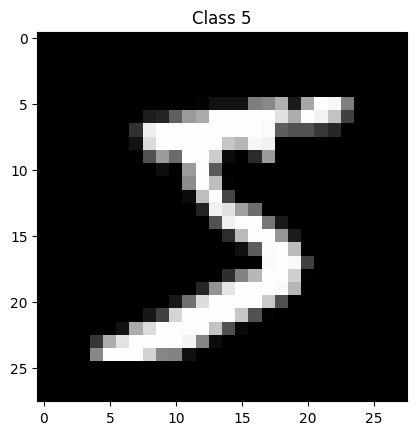

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')


# In[2]:


import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import LSTM


# In[3]:






# In[4]:


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
#from keras.utils import np_utils
from keras import utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)


# In[5]:


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)


# In[6]:


plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))


# In[7]:


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape


# In[8]:


number_of_classes = 10

Y_train = utils.to_categorical(y_train, number_of_classes)
Y_test = utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]


# In[9]:


# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


# In[10]:


model.summary()


# In[11]:


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# In[12]:


gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
 height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()


# In[13]:


train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)


# In[ ]:


# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
 validation_data=test_generator, validation_steps=10000//64)


# In[ ]:


score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])


# In[ ]:


#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test)
classes_x=np.argmax(predictions,axis=1)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

## 5. Make comments on your results in 4.

The CNN model achieves very good performance on the MNIST dataset. This simple CNN architecture of just 2 convolution + max pooling layers is able to efficiently extract features from the input images to classify the handwritten digits with high accuracy. Additional improvements could be made by tuning hyperparameters like number of filters, filter sizes, adding dropout, or more layers.

# PART 2:

## 1. Use the below code to load the data set.

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


## 2. Show the 10 classes

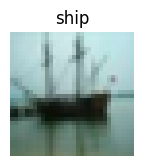

In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
ax = fig.add_subplot(rows, cols, i * rows + j + 1)
ax.grid('off')
ax.axis('off')
ax.imshow(x_train[random_index, :])
ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

## 3. Define a CNN architecture and train your own model by playing with the network setup: like, performs convolution, performs 2D max pooling, changing activation function from ReLU to LeakyReLU, adding dropout etc.



In [ ]:
# import necessary building blocks
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers import LeakyReLU


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation(LeakyReLU(alpha=0.1)))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))


# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

# Train model
model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
782/782 [==============================] - 218s 277ms/step - loss: 1.9098 - accuracy: 0.3912 - val_loss: 1.3012 - val_accuracy: 0.5435
Epoch 2/10
782/782 [==============================] - 207s 264ms/step - loss: 1.2721 - accuracy: 0.5508 - val_loss: 1.0329 - val_accuracy: 0.6403
Epoch 3/10
782/782 [==============================] - 206s 264ms/step - loss: 1.0901 - accuracy: 0.6169 - val_loss: 1.0374 - val_accuracy: 0.6436
Epoch 4/10
782/782 [==============================] - 211s 269ms/step - loss: 1.0042 - accuracy: 0.6499 - val_loss: 0.9260 - val_accuracy: 0.6781
Epoch 5/10
782/782 [==============================] - 208s 267ms/step - loss: 0.9364 - accuracy: 0.6731 - val_loss: 0.8508 - val_accuracy: 0.7108
Epoch 6/10
782/782 [==============================] - 209s 267ms/step - loss: 0.8882 - accuracy: 0.6923 - val_loss: 0.7882 - val_accuracy: 0.7228
Epoch 7/10
782/782 [==============================] - 207s 264ms/step - loss: 0.8502 - accuracy: 0.7028 - val_loss: 0.8798 -